# Data Preparation using Python for Data Science

<B>Prepared by</B>: Chukiat Worasucheep (KMUTT)<p>
<B>Date</B>: Sep 2, 2022.<p>

## Import libraries and input data

This dataset is a partial data of the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. Its original data is publicly available in the UCI Machine learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

#warnings.filterwarnings('ignore')
%matplotlib inline

In [164]:
filename = 'bank.csv'
df1 = pd.read_csv(filename)
df1.info()
# print(df1.shape)
# print(df1.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2000 non-null   int64  
 1   age        2000 non-null   int64  
 2   job        2000 non-null   object 
 3   marital    1998 non-null   object 
 4   education  2000 non-null   object 
 5   default    2000 non-null   object 
 6   balance    1998 non-null   float64
 7   housing    2000 non-null   object 
 8   loan       2000 non-null   object 
 9   contact    2000 non-null   object 
 10  duration   2000 non-null   int64  
 11  campaign   2000 non-null   int64  
 12  previous   1990 non-null   object 
 13  y          2000 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 218.9+ KB


In [3]:
df1.describe()

,id,age,balance,duration,campaign
count,2000.000000,2000.000000,1998.000000,2000.000000,2000.000000
mean,1000.499500,41.502500,1291.834835,268.816000,1.998500
std,577.495448,20.046469,2374.162006,374.466922,1.508521
min,1.000000,18.000000,-910.000000,5.000000,1.000000
25%,500.750000,33.000000,154.000000,113.000000,1.000000
50%,1000.500000,38.000000,551.000000,192.000000,1.000000
75%,1500.250000,48.000000,1536.000000,322.000000,2.000000
max,2000.000000,555.000000,37378.000000,9999.000000,16.000000


In [4]:
df1.describe().applymap('{:.2f}'.format)

,id,age,balance,duration,campaign
count,2000.00,2000.00,1998.00,2000.00,2000.00
mean,1000.50,41.50,1291.83,268.82,2.00
std,577.50,20.05,2374.16,374.47,1.51
min,1.00,18.00,-910.00,5.00,1.00
25%,500.75,33.00,154.00,113.00,1.00
50%,1000.50,38.00,551.00,192.00,1.00
75%,1500.25,48.00,1536.00,322.00,2.00
max,2000.00,555.00,37378.00,9999.00,16.00


In [5]:
df1.head(12)

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no
5,6,41,services,married,secondary,no,1141.0,yes,no,cellular,75,1,failure,no
6,7,58,retired,married,primary,no,565.0,no,no,telephone,153,1,success,yes
7,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no
8,10,42,technician,single,secondary,no,-15.0,no,no,cellular,89,1,failure,no
9,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no


In [6]:
df1['job'].unique()

array(['technician', 'admin.', 'management', 'services', 'retired',
       'blue-collar', 'housemaid', 'self-employed', 'unemployed',
       'student', 'entrepreneur', 'unknown'], dtype=object)

In [7]:
df1['job'].nunique()

12

In [8]:
df1['job'].value_counts()

management       429
blue-collar      371
technician       308
admin.           277
services         184
retired          127
student           79
self-employed     68
entrepreneur      58
unemployed        53
housemaid         40
unknown            6
Name: job, dtype: int64

## Handle missing values

In [9]:
# check to see if there are any missing values or NaN
df1.isnull().sum()

id            0
age           0
job           0
marital       2
education     0
default       0
balance       2
housing       0
loan          0
contact       0
duration      0
campaign      0
previous     10
y             0
dtype: int64

In [10]:
# drop (remove) all rows with NaN
df2 = df1.dropna()
df2.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
previous     0
y            0
dtype: int64

In [11]:
df2.shape

(1988, 14)

In [12]:
# Find only those rows which have missing values
#
null_data = df1[df1.isnull().any(axis=1)]
null_data

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no
10,11,555,blue-collar,married,primary,no,5131.0,yes,no,cellular,348,1,NaN,no
11,12,40,management,married,tertiary,no,3352.0,yes,no,cellular,9999,2,NaN,yes
12,13,33,services,single,secondary,no,100.0,yes,no,cellular,11,8,NaN,no
13,14,555,technician,divorced,secondary,no,1738.0,no,no,cellular,79,1,NaN,no
14,15,51,admin.,divorced,tertiary,no,66.0,yes,no,cellular,8888,1,NaN,no
15,16,51,housemaid,married,primary,no,605.0,no,no,cellular,91,2,NaN,no


We may control dropna() to look row-wised (default) or column-wise by setting its axis parameter:

axis{0 or ‘index’, 1 or ‘columns’}, default 0

Determine if rows or columns which contain missing values are removed.
- 0, or ‘index’ : Drop rows which contain missing values.
- 1, or ‘columns’ : Drop columns which contain missing value.

In [13]:
# drop all columns containing NaN
df2 = df1.dropna(axis=1)
df2.shape

(2000, 11)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2000 non-null   int64 
 1   age        2000 non-null   int64 
 2   job        2000 non-null   object
 3   education  2000 non-null   object
 4   default    2000 non-null   object
 5   housing    2000 non-null   object
 6   loan       2000 non-null   object
 7   contact    2000 non-null   object
 8   duration   2000 non-null   int64 
 9   campaign   2000 non-null   int64 
 10  y          2000 non-null   object
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [15]:
# Passing how='all' will only drop rows that are *all* NaN
df2 = df1.dropna(how='all')
df2.shape

(2000, 14)

In [16]:
# หลายคำสั่งจะมี option inplace=True เพื่อให้ดำเนินการนั้นลงไปใน dataframe เลย และจะ return nothing
df2 = df1.copy()
df3 = df2.dropna(inplace=True)  # and return nothing
type(df3), df3

(NoneType, None)

### Fill missing value ด้วยค่าบางอย่าง

In [17]:
# fill missing value ด้วยค่าที่เราเลือกกำหนดเอง เช่น 0
df2 = df1.fillna(0)
df2.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
previous     0
y            0
dtype: int64

In [18]:
# fill missing value ด้วยค่าที่กำหนดพร้อมกัน >1 cols, using dictionary
# fill missing marital with MMMMM, and previous with OTHER
df2 = df1.fillna({'marital': 'MMMMM', 'previous': 'OTHER'})
df2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,OTHER,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,OTHER,yes
3,4,51,management,MMMMM,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,MMMMM,secondary,no,873.0,no,no,cellular,301,1,failure,no


### Forward and Backward filling in (นิยมใช้กับ time series)

In [19]:
df2 = df1.copy(deep=True)
df2['balance'] = df1['balance'].fillna(method='ffill')
df2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,265.0,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,265.0,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no


In [20]:
# ลอง backward fill เพื่อ fill n/a ด้วยค่าถัดไปที่มี
df2['balance'] = df1['balance'].fillna(method='bfill')
df2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,873.0,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,873.0,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no


### Filling in with mean value or interpolation

In [21]:
# ลองดูค่า mean เพื่อใช้ในการ fill missing values
df1['balance'].mean()

1291.8348348348347

In [22]:
# fill missing values ด้วยค่า mean
df2['balance'] = df1['balance'] #.fillna(...)
df2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no


In [23]:
# filling in with linear interpolation use option method='linear'
df2['balance'] = df1['balance'] # .interpolate(...)
df2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no


In [24]:
# filling in with quadratic interpolation
df2['balance'] = df1['balance'] # .interpolate(...)
df2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no


More about Series Interpolation: https://pandas.pydata.org/docs/reference/api/pandas.Series.interpolate.html <p>
and Pandas Interpolation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

## Handling duplicates

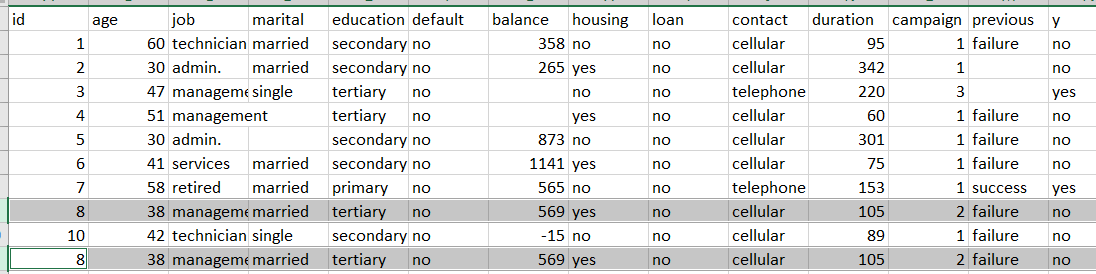

In [25]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [26]:
df2 = df1.drop_duplicates() # inplace=True)
df2.head(12)

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no
5,6,41,services,married,secondary,no,1141.0,yes,no,cellular,75,1,failure,no
6,7,58,retired,married,primary,no,565.0,no,no,telephone,153,1,success,yes
7,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no
8,10,42,technician,single,secondary,no,-15.0,no,no,cellular,89,1,failure,no
10,11,555,blue-collar,married,primary,no,5131.0,yes,no,cellular,348,1,NaN,no


In [27]:
df1.head(12)

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,2,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no
5,6,41,services,married,secondary,no,1141.0,yes,no,cellular,75,1,failure,no
6,7,58,retired,married,primary,no,565.0,no,no,telephone,153,1,success,yes
7,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no
8,10,42,technician,single,secondary,no,-15.0,no,no,cellular,89,1,failure,no
9,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no


In [28]:
# drop_duplicates() โดยเลือกให้พิจารณาเพียงบาง column(s) ก็ได้
df2 = df1.drop_duplicates(['marital', 'education'])
df2.shape

(14, 14)

In [29]:
df2

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no
6,7,58,retired,married,primary,no,565.0,no,no,telephone,153,1,success,yes
7,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no
8,10,42,technician,single,secondary,no,-15.0,no,no,cellular,89,1,failure,no
13,14,555,technician,divorced,secondary,no,1738.0,no,no,cellular,79,1,NaN,no
14,15,51,admin.,divorced,tertiary,no,66.0,yes,no,cellular,8888,1,NaN,no
39,40,26,services,single,primary,no,-32.0,yes,no,cellular,486,2,other,no


## Handling Outliers

Look at the duration (in seconds) 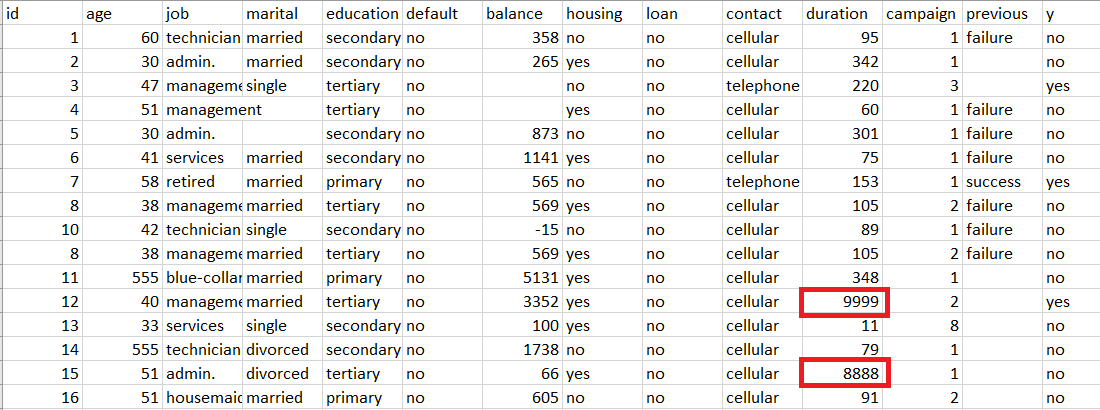

<b>Common methods</b> to handle outliers:
<ol>
<li>Use constant [upper, lower] boundaries.
<li>Use statistical Z-score.
<li>Use statistical interquartile range (IQR).
</ol>

### Use constants to detect the outliers

In [30]:
# ต้องการหาดู rows ที่ duration มากกว่า 5000
df1[df1['duration'] > 5000]

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
11,12,40,management,married,tertiary,no,3352.0,yes,no,cellular,9999,2,NaN,yes
14,15,51,admin.,divorced,tertiary,no,66.0,yes,no,cellular,8888,1,NaN,no


In [31]:
# ลบ rows ตามเงื่อนไขที่ต้องการ "rows ที่ duration มากกว่า 5000"
# ใช้แบบข้อที่แล้วแล้วต่อท้ายด้วย .index
# df2 = df1.drop()
df2.head(14)

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
2,3,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,4,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,5,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no
6,7,58,retired,married,primary,no,565.0,no,no,telephone,153,1,success,yes
7,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no
8,10,42,technician,single,secondary,no,-15.0,no,no,cellular,89,1,failure,no
13,14,555,technician,divorced,secondary,no,1738.0,no,no,cellular,79,1,NaN,no
14,15,51,admin.,divorced,tertiary,no,66.0,yes,no,cellular,8888,1,NaN,no
39,40,26,services,single,primary,no,-32.0,yes,no,cellular,486,2,other,no


### Use z-score to detect outliers

In [32]:
# หา z-score ของ data
from scipy.stats import zscore

df1['z']= zscore(df1['duration'])
condition = (df1['z']>3) | (df1['z']<-3)

# ดูลักษณะของข้อมูลเฉพาะที่ตรงตามเงื่อนไข |z| > 3
df1[condition].describe()

,id,age,balance,duration,campaign,z
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,951.461538,43.615385,1763.846154,2843.307692,1.538462,6.876804
std,663.972968,11.579713,1522.905986,2946.568665,0.660225,7.870670
min,12.000000,27.000000,0.000000,1416.000000,1.000000,3.064278
25%,405.000000,37.000000,775.000000,1472.000000,1.000000,3.213862
50%,884.000000,40.000000,1819.000000,1628.000000,1.000000,3.630558
75%,1308.000000,51.000000,2580.000000,1925.000000,2.000000,4.423884
max,1966.000000,63.000000,5112.000000,9999.000000,3.000000,25.990593


In [33]:
df1.drop(columns=['z'], inplace=True, errors='ignore') # ignore if failed

df2 = df1.drop(df1[condition].index)
df2.describe()

,id,age,balance,duration,campaign
count,1987.000000,1987.000000,1985.000000,1987.000000,1987.000000
mean,1000.820332,41.488676,1288.743577,251.972320,2.001510
std,577.065316,20.091088,2378.672279,212.162528,1.512119
min,1.000000,18.000000,-910.000000,5.000000,1.000000
25%,501.500000,33.000000,153.000000,112.000000,1.000000
50%,1001.000000,38.000000,545.000000,191.000000,1.000000
75%,1500.500000,48.000000,1533.000000,317.000000,2.000000
max,2000.000000,555.000000,37378.000000,1370.000000,16.000000


### Use interquartile range to handle outliers
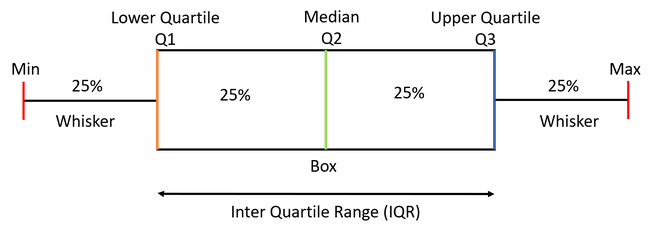

In [34]:
# Remove outliers from a dataframe by column, including optional whiskers, 
# keeping rows for which the column value are between Q1-1.5IQR and Q3+1.5IQR.
#
def filter_with_iqr(df, column, whisker_width=1.5):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]

In [35]:
# copy of df1 to df2, so as leave df12 untouched and...
# then change df2's duration with some very high values
df2 = df1.copy()
df2.loc[0:11:2, 'duration'] = 7777
df2.loc[11:20:2, 'duration'] = -7777
# see the first 15 rows of df2

In [36]:
# Example for whiskers = 1.5 (default)
df3 = filter_with_iqr(df2, 'duration')
# see the first 15 rows of df3

In [37]:
print(df1.describe())
print(df2.describe())
print(df3.describe())

                id          age       balance     duration     campaign
count  2000.000000  2000.000000   1998.000000  2000.000000  2000.000000
mean   1000.499500    41.502500   1291.834835   268.816000     1.998500
std     577.495448    20.046469   2374.162006   374.466922     1.508521
min       1.000000    18.000000   -910.000000     5.000000     1.000000
25%     500.750000    33.000000    154.000000   113.000000     1.000000
50%    1000.500000    38.000000    551.000000   192.000000     1.000000
75%    1500.250000    48.000000   1536.000000   322.000000     2.000000
max    2000.000000   555.000000  37378.000000  9999.000000    16.000000
                id          age       balance   duration     campaign
count  2000.000000  2000.000000   1998.000000  2000.0000  2000.000000
mean   1000.499500    41.502500   1291.834835   266.9220     1.998500
std     577.495448    20.046469   2374.162006   651.0568     1.508521
min       1.000000    18.000000   -910.000000 -7777.0000     1.000000
25

<AxesSubplot:>

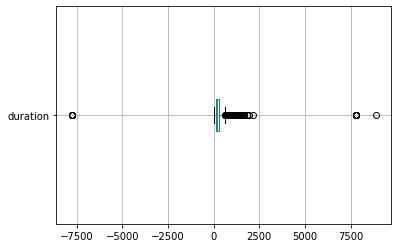

In [38]:
# horizontal boxplot of data 'before' outliers removal
df2.boxplot(column=['duration'], vert=False)

In [39]:
# horizontal boxplot of data 'after' outliers removal
#df3

In [40]:
df3.describe()

,id,age,balance,duration,campaign
count,1865.000000,1865.000000,1864.000000,1865.000000,1865.000000
mean,1006.209115,40.821448,1255.796137,213.892225,1.996247
std,577.297431,11.563956,2336.219882,138.977943,1.520774
min,2.000000,18.000000,-910.000000,5.000000,1.000000
25%,501.000000,33.000000,144.750000,109.000000,1.000000
50%,1009.000000,38.000000,525.000000,182.000000,1.000000
75%,1504.000000,47.000000,1492.750000,287.000000,2.000000
max,2000.000000,93.000000,37378.000000,637.000000,16.000000


## Column operations

In [57]:
df2 = df1.copy()

In [46]:
df2.age

0       60
1       30
2       47
3       51
4       30
        ..
1995    33
1996    31
1997    60
1998    61
1999    42
Name: age, Length: 2000, dtype: int64

In [52]:
df2['age']

0       60
2       47
4       30
6       58
8       42
        ..
1990    33
1992    56
1994    39
1996    31
1998    61
Name: age, Length: 1000, dtype: int64

In [48]:
# ต้องการทั้ง age, education และ balance พร้อมกัน และต้องการ row เว้น row
#df2??

In [51]:
df2.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'y'],
      dtype='object')

In [54]:
# เลือกดู age, marital, balance เฉพาะ rows เลขคู่จำนวน 7 รายการ
# ใช้ .iloc[rows, cols]
# df2.iloc

### Drop a or more column(s)

In [61]:
# delete a column
df2.drop('id', axis=1)  # ต้องระบุ axis ด้วย ไม่งั้น error

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y
0,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no
1,30,admin.,married,secondary,no,265.0,yes,no,cellular,342,1,NaN,no
2,47,management,single,tertiary,no,NaN,no,no,telephone,220,3,NaN,yes
3,51,management,NaN,tertiary,no,NaN,yes,no,cellular,60,1,failure,no
4,30,admin.,NaN,secondary,no,873.0,no,no,cellular,301,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,33,management,single,tertiary,no,935.0,no,no,cellular,385,2,success,yes
1996,31,management,married,tertiary,no,1224.0,yes,yes,cellular,75,2,success,no
1997,60,technician,married,secondary,no,824.0,yes,no,cellular,127,1,other,yes
1998,61,retired,married,primary,no,1720.0,no,no,cellular,150,1,failure,no


In [65]:
# delete 3 columns id, contact, y
df3 = df2.drop(['id', 'contact', 'y'], axis=1)
df3.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous
0,60,technician,married,secondary,no,358.0,no,no,95,1,failure
1,30,admin.,married,secondary,no,265.0,yes,no,342,1,NaN
2,47,management,single,tertiary,no,NaN,no,no,220,3,NaN
3,51,management,NaN,tertiary,no,NaN,yes,no,60,1,failure
4,30,admin.,NaN,secondary,no,873.0,no,no,301,1,failure


### Rename one or more columns

In [69]:
# rename 1 column
# จาก df2 เปลี่ยนชื่อ column y เป็น outcome และลบ col id, housing, loan, campaign ทิ้ง
df3 = df2.rename(columns={"y": "outcome"})
df3.drop(['id', 'housing', 'loan', 'campaign'], axis=1, inplace=True)
df3

,age,job,marital,education,default,balance,contact,duration,previous,outcome
0,60,technician,married,secondary,no,358.0,cellular,95,failure,no
1,30,admin.,married,secondary,no,265.0,cellular,342,NaN,no
2,47,management,single,tertiary,no,NaN,telephone,220,NaN,yes
3,51,management,NaN,tertiary,no,NaN,cellular,60,failure,no
4,30,admin.,NaN,secondary,no,873.0,cellular,301,failure,no
...,...,...,...,...,...,...,...,...,...,...
1995,33,management,single,tertiary,no,935.0,cellular,385,success,yes
1996,31,management,married,tertiary,no,1224.0,cellular,75,success,no
1997,60,technician,married,secondary,no,824.0,cellular,127,other,yes
1998,61,retired,married,primary,no,1720.0,cellular,150,failure,no


In [70]:
# rename 2 columns
# rename df3's age -> AGE and education -> EDUCATION into df3 ==> using dictionary
df4 = df3.rename(columns={'age': 'AGE', 'education': 'EDUCATION'})
df4.head()

,AGE,job,marital,EDUCATION,default,balance,contact,duration,previous,outcome
0,60,technician,married,secondary,no,358.0,cellular,95,failure,no
1,30,admin.,married,secondary,no,265.0,cellular,342,NaN,no
2,47,management,single,tertiary,no,NaN,telephone,220,NaN,yes
3,51,management,NaN,tertiary,no,NaN,cellular,60,failure,no
4,30,admin.,NaN,secondary,no,873.0,cellular,301,failure,no


### Data (or column) generation: an introduction to feature engineering

In [102]:
# advance calculation of new column
# คำนวณ duration เป็นนาที, สร้าง col category short/long แบ่งด้วย duration ที่ 3 นาที, แล้วกำหนด ratio = balance / age
#
pd.set_option('mode.chained_assignment', None) # suppresses and turn off the warning of chained_assignment
df2 = df1.dropna()
df2['minutes'] = df2.duration / 60.
df2['category'] = ['short' if i<3 else 'long' for i in df2['minutes']]
df2['ratio'] = df2['balance'] / df2['age']
print(df2.category.value_counts())

long     1073
short     915
Name: category, dtype: int64


In [103]:
df2

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,y,minutes,category,ratio
0,1,60,technician,married,secondary,no,358.0,no,no,cellular,95,1,failure,no,1.583333,short,5.966667
5,6,41,services,married,secondary,no,1141.0,yes,no,cellular,75,1,failure,no,1.250000,short,27.829268
6,7,58,retired,married,primary,no,565.0,no,no,telephone,153,1,success,yes,2.550000,short,9.741379
7,8,38,management,married,tertiary,no,569.0,yes,no,cellular,105,2,failure,no,1.750000,short,14.973684
8,10,42,technician,single,secondary,no,-15.0,no,no,cellular,89,1,failure,no,1.483333,short,-0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,33,management,single,tertiary,no,935.0,no,no,cellular,385,2,success,yes,6.416667,long,28.333333
1996,1997,31,management,married,tertiary,no,1224.0,yes,yes,cellular,75,2,success,no,1.250000,short,39.483871
1997,1998,60,technician,married,secondary,no,824.0,yes,no,cellular,127,1,other,yes,2.116667,short,13.733333
1998,1999,61,retired,married,primary,no,1720.0,no,no,cellular,150,1,failure,no,2.500000,short,28.196721


In [105]:
df2 = df2[['id', 'age', 'minutes', 'category', 'ratio']]
df2

,id,age,minutes,category,ratio
0,1,60,1.583333,short,5.966667
5,6,41,1.250000,short,27.829268
6,7,58,2.550000,short,9.741379
7,8,38,1.750000,short,14.973684
8,10,42,1.483333,short,-0.357143
...,...,...,...,...,...
1995,1996,33,6.416667,long,28.333333
1996,1997,31,1.250000,short,39.483871
1997,1998,60,2.116667,short,13.733333
1998,1999,61,2.500000,short,28.196721


## Row operations

### Select specific rows

In [116]:
df2 = df1.drop(['default', 'campaign', 'previous', 'y'], axis=1)
df2

,id,age,job,marital,education,balance,housing,loan,contact,duration
0,1,60,technician,married,secondary,358.0,no,no,cellular,95
1,2,30,admin.,married,secondary,265.0,yes,no,cellular,342
2,3,47,management,single,tertiary,NaN,no,no,telephone,220
3,4,51,management,NaN,tertiary,NaN,yes,no,cellular,60
4,5,30,admin.,NaN,secondary,873.0,no,no,cellular,301
...,...,...,...,...,...,...,...,...,...,...
1995,1996,33,management,single,tertiary,935.0,no,no,cellular,385
1996,1997,31,management,married,tertiary,1224.0,yes,yes,cellular,75
1997,1998,60,technician,married,secondary,824.0,yes,no,cellular,127
1998,1999,61,retired,married,primary,1720.0,no,no,cellular,150


In [117]:
# เลือก rows ที่ 3 ถึง 7
df2.iloc[3:8,]

,id,age,job,marital,education,balance,housing,loan,contact,duration
3,4,51,management,NaN,tertiary,NaN,yes,no,cellular,60
4,5,30,admin.,NaN,secondary,873.0,no,no,cellular,301
5,6,41,services,married,secondary,1141.0,yes,no,cellular,75
6,7,58,retired,married,primary,565.0,no,no,telephone,153
7,8,38,management,married,tertiary,569.0,yes,no,cellular,105


In [59]:
# เลือก 3 rows สุดท้าย
df2.iloc[-3:,]

,id,age,job,marital,education,balance,housing,loan,contact,duration
1997,1998,60,technician,married,secondary,824.0,yes,no,cellular,127
1998,1999,61,retired,married,primary,1720.0,no,no,cellular,150
1999,2000,42,blue-collar,married,secondary,2717.0,yes,yes,cellular,181


In [60]:
df2.tail(3)

,id,age,job,marital,education,balance,housing,loan,contact,duration
1997,1998,60,technician,married,secondary,824.0,yes,no,cellular,127
1998,1999,61,retired,married,primary,1720.0,no,no,cellular,150
1999,2000,42,blue-collar,married,secondary,2717.0,yes,yes,cellular,181


In [122]:
# เลือกสุ่มมา 5 rows
df2.sample(5)

,id,age,job,marital,education,balance,housing,loan,contact,duration,duration_before,duration_after
1609,1610,44,unemployed,married,secondary,0.0,yes,no,cellular,58,131.0,69.0
169,170,57,management,divorced,unknown,2986.0,no,no,cellular,222,233.0,137.0
641,642,49,services,single,unknown,5095.0,yes,no,cellular,127,167.0,79.0
639,640,46,admin.,divorced,secondary,875.0,yes,yes,cellular,269,240.0,167.0
1262,1263,27,student,single,tertiary,5291.0,no,no,cellular,192,17.0,363.0


### .shift(n) to get the value of the n-th prior (n > 0) or following (n < 0) rows

In [125]:
df2['duration_before'] = df2.duration.shift(1)  # mostly used in time series e.g. financial data!!!
df2['duration_after']  = df2.duration.shift(-1) # mostly used in time series e.g. financial data!!!
df2[['id', 'duration', 'duration_before', 'duration_after']]

,id,duration,duration_before,duration_after
0,1,95,NaN,342.0
1,2,342,95.0,220.0
2,3,220,342.0,60.0
3,4,60,220.0,301.0
4,5,301,60.0,75.0
...,...,...,...,...
1995,1996,385,517.0,75.0
1996,1997,75,385.0,127.0
1997,1998,127,75.0,150.0
1998,1999,150,127.0,181.0


In [129]:
df2.drop(['duration_before', 'duration_after'], axis=1, inplace=True)
df2

,id,age,job,marital,education,balance,housing,loan,contact,duration
0,1,60,technician,married,secondary,358.0,no,no,cellular,95
1,2,30,admin.,married,secondary,265.0,yes,no,cellular,342
2,3,47,management,single,tertiary,NaN,no,no,telephone,220
3,4,51,management,NaN,tertiary,NaN,yes,no,cellular,60
4,5,30,admin.,NaN,secondary,873.0,no,no,cellular,301
...,...,...,...,...,...,...,...,...,...,...
1995,1996,33,management,single,tertiary,935.0,no,no,cellular,385
1996,1997,31,management,married,tertiary,1224.0,yes,yes,cellular,75
1997,1998,60,technician,married,secondary,824.0,yes,no,cellular,127
1998,1999,61,retired,married,primary,1720.0,no,no,cellular,150


### Find rows containing a specific string

In [130]:
# หา rows ที่ job มีคำว่า tech อยู่
df2[df2['job'].str.contains("tech")]

,id,age,job,marital,education,balance,housing,loan,contact,duration
0,1,60,technician,married,secondary,358.0,no,no,cellular,95
8,10,42,technician,single,secondary,-15.0,no,no,cellular,89
13,14,555,technician,divorced,secondary,1738.0,no,no,cellular,79
18,19,50,technician,single,secondary,-97.0,yes,no,cellular,425
29,30,45,technician,single,secondary,-55.0,no,no,cellular,78
...,...,...,...,...,...,...,...,...,...,...
1957,1958,41,technician,married,secondary,-312.0,yes,no,cellular,90
1973,1974,29,technician,married,tertiary,676.0,no,no,cellular,93
1991,1992,37,technician,married,primary,1653.0,yes,yes,cellular,285
1993,1994,32,technician,married,tertiary,15.0,no,no,cellular,226


In [127]:
# หา rows ที่ job เป็น technician หรือ management
#df2[df2['job'].isin(...)]

,id,age,job,marital,education,balance,housing,loan,contact,duration,duration_before,duration_after
0,1,60,technician,married,secondary,358.0,no,no,cellular,95,NaN,342.0
2,3,47,management,single,tertiary,NaN,no,no,telephone,220,342.0,60.0
3,4,51,management,NaN,tertiary,NaN,yes,no,cellular,60,220.0,301.0
7,8,38,management,married,tertiary,569.0,yes,no,cellular,105,153.0,89.0
8,10,42,technician,single,secondary,-15.0,no,no,cellular,89,105.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1994,32,technician,married,tertiary,15.0,no,no,cellular,226,92.0,517.0
1994,1995,39,management,married,tertiary,691.0,yes,yes,cellular,517,226.0,385.0
1995,1996,33,management,single,tertiary,935.0,no,no,cellular,385,517.0,75.0
1996,1997,31,management,married,tertiary,1224.0,yes,yes,cellular,75,385.0,127.0


### Conditional row filtering
ใช้เครื่องหมายเปรียบเทียบต่อไปนี้ <code> ==    !=     <     >     <=    >=    &    | </code>

In [131]:
df2[df2.age == 555]

,id,age,job,marital,education,balance,housing,loan,contact,duration
10,11,555,blue-collar,married,primary,5131.0,yes,no,cellular,348
13,14,555,technician,divorced,secondary,1738.0,no,no,cellular,79


In [132]:
# หา rows ที่ age ไม่ต่ำกว่า 85
df2[df2.age >= 85]

,id,age,job,marital,education,balance,housing,loan,contact,duration
10,11,555,blue-collar,married,primary,5131.0,yes,no,cellular,348
13,14,555,technician,divorced,secondary,1738.0,no,no,cellular,79
238,239,93,retired,married,unknown,775.0,no,no,cellular,476
271,272,88,retired,married,secondary,433.0,no,no,telephone,161
436,437,86,retired,married,primary,1255.0,no,no,cellular,192


In [138]:
# หา rows ที่ age ไม่ต่ำกว่า 85 และ housingไม่เท่ากับ yes. แล้วเก็บผลลัพธ์ลง df3
df3 = df2[ (df2.age >= 85) & (df2.housing != 'yes') ]
df3

,id,age,job,marital,education,balance,housing,loan,contact,duration
13,14,555,technician,divorced,secondary,1738.0,no,no,cellular,79
238,239,93,retired,married,unknown,775.0,no,no,cellular,476
271,272,88,retired,married,secondary,433.0,no,no,telephone,161
436,437,86,retired,married,primary,1255.0,no,no,cellular,192


In [140]:
# หา rows ที่ age ไม่ต่ำกว่า 85 หรือ housing ไม่เท่ากับ yes. แล้วเก็บผลลัพธ์ลง df3
df3 = df2[ (df2.age >= 85) | (df2.housing != 'yes') ]
df3

,id,age,job,marital,education,balance,housing,loan,contact,duration
0,1,60,technician,married,secondary,358.0,no,no,cellular,95
2,3,47,management,single,tertiary,NaN,no,no,telephone,220
4,5,30,admin.,NaN,secondary,873.0,no,no,cellular,301
6,7,58,retired,married,primary,565.0,no,no,telephone,153
8,10,42,technician,single,secondary,-15.0,no,no,cellular,89
...,...,...,...,...,...,...,...,...,...,...
1984,1985,43,blue-collar,married,secondary,130.0,no,no,cellular,156
1987,1988,59,management,married,primary,8334.0,no,no,cellular,141
1993,1994,32,technician,married,tertiary,15.0,no,no,cellular,226
1995,1996,33,management,single,tertiary,935.0,no,no,cellular,385


In [141]:
# ลบ row โดยระบุ index ของ row
df3.drop(df3.index[2])     # 2 is row index to be deleted

,id,age,job,marital,education,balance,housing,loan,contact,duration
0,1,60,technician,married,secondary,358.0,no,no,cellular,95
2,3,47,management,single,tertiary,NaN,no,no,telephone,220
6,7,58,retired,married,primary,565.0,no,no,telephone,153
8,10,42,technician,single,secondary,-15.0,no,no,cellular,89
10,11,555,blue-collar,married,primary,5131.0,yes,no,cellular,348
...,...,...,...,...,...,...,...,...,...,...
1984,1985,43,blue-collar,married,secondary,130.0,no,no,cellular,156
1987,1988,59,management,married,primary,8334.0,no,no,cellular,141
1993,1994,32,technician,married,tertiary,15.0,no,no,cellular,226
1995,1996,33,management,single,tertiary,935.0,no,no,cellular,385


In [148]:
# ลบ row โดยระบุเงื่อนไข ว่า duration < 500 เก็บผลลัพธ์ลง df4
df4 = df3.drop(df3[df3.duration < 500].index)
df4

,id,age,job,marital,education,balance,housing,loan,contact,duration
43,44,72,retired,married,primary,3856.0,no,no,cellular,582
61,62,26,technician,single,secondary,1873.0,no,no,cellular,1013
85,86,67,retired,married,primary,2391.0,no,no,cellular,737
99,100,32,management,single,tertiary,2915.0,no,no,cellular,519
187,188,32,student,single,tertiary,64.0,no,no,cellular,598
...,...,...,...,...,...,...,...,...,...,...
1922,1923,30,self-employed,married,tertiary,2666.0,no,no,cellular,781
1924,1925,33,unemployed,married,secondary,1211.0,no,no,cellular,535
1951,1952,59,technician,married,tertiary,883.0,no,no,cellular,1551
1965,1966,38,services,married,secondary,775.0,no,no,cellular,1835


## Data combination and replacement

### Merge dataframe (ไปดู slides ต่อ)
<p>
<li>pandas.merge ใช้รวม rows ต่างๆ dataFrames โดยขึ้นอยู่กับอย่างน้อย 1 keys. คล้าย join operations ใน SQL database
    - มี วิธีการ merge 4 วิธีคือ left, right, inner (คล้าย intersection) <font color='red'>**(default)**</font>, และ outer (คล้าย union)
<li>pandas.join คล้าย merge แต่ไม่ครอบคลุมเท่า
<li>pandas.concat ใช้ต่อ concatenates or “stacks” together objects along an axis.

In [171]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})

In [172]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [173]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [174]:
# ใช้ pd.merge() เพื่อ merge หรือ join datasets
# หากไม่กำหนด column จะใช้ column ที่ชื่อตรงกัน
#
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [175]:
# แต่แนะนำให้ระบุ column ทุกครั้งที่ merge ด้วย parameter on=ชื่อ_key
pd.merge(df1, df2, ...)

KeyError: Ellipsis

### Merge ด้วย composite key (key ที่มากกว่า 1 col)

In [176]:
and_op = pd.DataFrame({'A':['0', '0', '1','1'],
                       'B':['0', '1', '0','1'], 
                       'AND':[False, False, False, True]})
or_op = pd.DataFrame({'A':['0', '0', '1','1'], 
                      'B':['0', '1', '0','1'],
                      'OR':[False, True, True, True]})
and_op

,A,B,AND
0,0,0,False
1,0,1,False
2,1,0,False
3,1,1,True


In [177]:
or_op

,A,B,OR
0,0,0,False
1,0,1,True
2,1,0,True
3,1,1,True


In [178]:
result = pd.merge(and_op, or_op, on=['A','B'])
result

,A,B,AND,OR
0,0,0,False,False
1,0,1,False,True
2,1,0,False,True
3,1,1,True,True


### Merge 2 dataframe with different key
โดยการระบุชื่อ column ของทั้งสอง dataset ให้ชัดเจน

In [179]:
#ถ้า 2 dataframe จะ merge กันด้วย column ชื่อต่างกัน ก็ได้ โดยการระบุใช้ชัดเจน
#
df3 = pd.DataFrame({'left_key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1': range(7)})
df4 = pd.DataFrame({'right_key': ['a', 'b', 'd'], 'data2': range(3)})

In [180]:
df3

,left_key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [181]:
df4

,right_key,data2
0,a,0
1,b,1
2,d,2


In [182]:
# merge ระบุชื่อ key จากสอง dataframeด้วย left_on='' กับ right_on=''
pd.merge(df3, df4, left_on='left_key', right_on='right_key')

,left_key,data1,right_key,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


### การ merge หรือ join มี 4 วิธี คือ left join, right join, outer join
<B>หากไม่ระบุวิธี เช่นที่ผ่านมา จะเรียกว่า inner join</B>

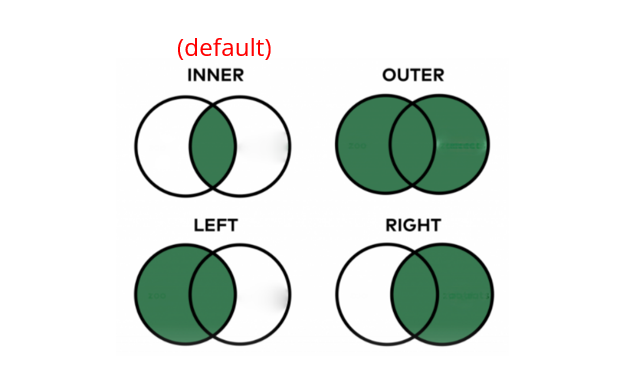

In [183]:
# กำหนดวิธี join ด้วย how=[method]
# left join เอา dataset ซ้ายเป็นหลัก
#
pd.merge(df1, df2, how='left')

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [82]:
# right join เอา dataset ขวาเป็นหลัก
pd.merge(df1, df2...)

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2


In [184]:
# Outer join คงทุก rows ของทั้งสอง dataset ไว้ คล้าย ๆ union
df = pd.merge(df1, df2, how='outer')
df

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


### Concat dataframes to add rows from one dataframe to another dataframe

In [185]:
# reload df1 dataframe
df1 = pd.read_csv(filename)

first = df1.iloc[:4,:6]
first

,id,age,job,marital,education,default
0,1,60,technician,married,secondary,no
1,2,30,admin.,married,secondary,no
2,3,47,management,single,tertiary,no
3,4,51,management,NaN,tertiary,no


In [186]:
second = df1.iloc[4:9,:6]
second

,id,age,job,marital,education,default
4,5,30,admin.,NaN,secondary,no
5,6,41,services,married,secondary,no
6,7,58,retired,married,primary,no
7,8,38,management,married,tertiary,no
8,10,42,technician,single,secondary,no


In [194]:
df = pd.concat([first, second])
df

,id,age,job,marital,education,default
0,1,60,technician,married,secondary,no
1,2,30,admin.,married,secondary,no
2,3,47,management,single,tertiary,no
3,4,51,management,NaN,tertiary,no
4,5,30,admin.,NaN,secondary,no
5,6,41,services,married,secondary,no
6,7,58,retired,married,primary,no
7,8,38,management,married,tertiary,no
8,10,42,technician,single,secondary,no


In [195]:
df = first.append(second) # The frame.append method is deprecated and will be removed from pandas in a future version.
df

C:\Users\chuki\AppData\Local\Temp/ipykernel_19960/3049941829.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = first.append(second) # The frame.append method is deprecated and will be removed from pandas in a future version.


,id,age,job,marital,education,default
0,1,60,technician,married,secondary,no
1,2,30,admin.,married,secondary,no
2,3,47,management,single,tertiary,no
3,4,51,management,NaN,tertiary,no
4,5,30,admin.,NaN,secondary,no
5,6,41,services,married,secondary,no
6,7,58,retired,married,primary,no
7,8,38,management,married,tertiary,no
8,10,42,technician,single,secondary,no


### Replace values with condition

In [196]:
df.loc[df['age'] > 45, 'job'] = 'retired'
df

,id,age,job,marital,education,default
0,1,60,retired,married,secondary,no
1,2,30,admin.,married,secondary,no
2,3,47,retired,single,tertiary,no
3,4,51,retired,NaN,tertiary,no
4,5,30,admin.,NaN,secondary,no
5,6,41,services,married,secondary,no
6,7,58,retired,married,primary,no
7,8,38,management,married,tertiary,no
8,10,42,technician,single,secondary,no


In [197]:
df.age = df.age.replace(60, 61)
df

,id,age,job,marital,education,default
0,1,61,retired,married,secondary,no
1,2,30,admin.,married,secondary,no
2,3,47,retired,single,tertiary,no
3,4,51,retired,NaN,tertiary,no
4,5,30,admin.,NaN,secondary,no
5,6,41,services,married,secondary,no
6,7,58,retired,married,primary,no
7,8,38,management,married,tertiary,no
8,10,42,technician,single,secondary,no


## Set index and Reset index
<p>
<li>Index มีใช้ระบุ rows นั่นคือ ทุก rows จะต้องมี index ไม่ซ้ำกันแน่นอน (unique)
<li>Index จะเป็นส่วนหนึ่งของ data คือเป็นบาง column ก็ได้ หรือจะมีต่างหากก็ได้
<li>Python สามารถให้ dataframe มี index แบบมากกว่า 1 ชั้น (Hierarchical) ได้
<li>ช่วยในการทำงานต่างระดับกัน

In [203]:
# สร้าง dataframe เพื่อทดสอบการ set_index() และ reset_index()
frame = pd.DataFrame({'a': ['one', 'one', 'one', 'two', 'two', 'two', 'two'], 
                      'b': [0, 1, 2, 0, 1, 2, 3],
                      'c': range(7), 
                      'd': range(7, 0, -1)
                     })
frame

,a,b,c,d
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [204]:
# set index ใส่ชื่อ column ที่ต้องการให้ไปเป็น index
frame2 = frame.set_index('a')
frame2

,b,c,d
a,,,
one,0,0,7
one,1,1,6
one,2,2,5
two,0,3,4
two,1,4,3
two,2,5,2
two,3,6,1


In [110]:
# set index ให้มี 2 ชั้นได้ ลองกำหนดให้ทั้ง a และ b
frame2 = frame.set_index(['a', 'b'])
frame2

c  d
a   b      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

By default the columns are removed from the DataFrame, though you can leave them
in:

In [111]:
# ต้องการให้ column (ที่ไปเป็น index) ยังคงอยู่ด้วย drop=False
frame.set_index(['a', 'b'], drop=False)

a  b  c  d
a   b              
one 0  one  0  0  7
    1  one  1  1  6
    2  one  2  2  5
two 0  two  0  3  4
    1  two  1  4  3
    2  two  2  5  2
    3  two  3  6  1

reset_index, on the other hand, does the opposite of set_index; the hierarchical
index levels are moved into the columns:

In [112]:
# reset_index() ทำตรงข้ามกับ set_index() คือยกเลิกการเป็น index
frame2.reset_index('b')

,b,c,d
a,,,
one,0,0,7
one,1,1,6
one,2,2,5
two,0,3,4
two,1,4,3
two,2,5,2
two,3,6,1


## Discretization
To go from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.

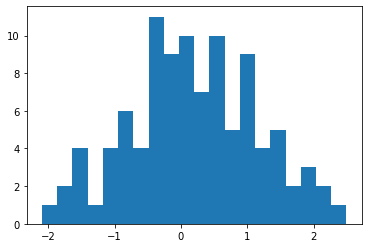

In [198]:
import matplotlib.pyplot as plt

np.random.seed(999)
data = np.random.randn(100) # Normally distributed
plt.hist(data, bins=20)  # arguments are passed to np.histogram
plt.show()

In [201]:
# pd.cut(dataframe, n) แบ่งข้อมูลออกเป็น n ช่วงๆ ตามค่าของข้อมูล
#
c = pd.cut(data, 4)
c.value_counts()

(-2.096, -0.946]    12
(-0.946, 0.2]       40
(0.2, 1.346]        35
(1.346, 2.491]      13
dtype: int64

In [202]:
# pd.qcut(dataframe, n) แบ่งข้อมูลออกเป็น n ช่วงๆ ละจำนวนเท่าๆ กัน
#
# cats = pd.qcut
cats.value_counts()

(-2.092, -0.455]    25
(-0.455, 0.14]      25
(0.14, 0.918]       25
(0.918, 2.491]      25
dtype: int64

## Data encoding

### Creating Dummy Variables

จาก column หนึ่งมีค่าแตกต่างอยู่ k ค่า เราต้องการสร้าง k columns ใหม่ที่มีค่า 0 หรือ 1 สอดคล้องกับข้อมูลเดิม โดยจะมี 1 ได้เพียง 1 (จาก k) column เท่านั้น
ใช้เพิ่มประสิทธิภาพในการจำแนกประเภทข้อมูล (classification) และอื่นๆ

In [93]:
# reload df1 dataframe
df1 = pd.read_csv(filename)
df2 = df1[['age', 'job', 'education', 'balance']][66:77].reset_index()
df2

,index,age,job,education,balance
0,66,35,blue-collar,primary,455.0
1,67,42,technician,unknown,254.0
2,68,37,blue-collar,secondary,-100.0
3,69,34,admin.,secondary,2374.0
4,70,31,management,tertiary,775.0
5,71,50,technician,secondary,-70.0
6,72,36,management,tertiary,203.0
7,73,60,technician,primary,4243.0
8,74,38,blue-collar,secondary,105.0
9,75,32,management,tertiary,2213.0


In [94]:
# ลองดูข้อมูล education ก่อนทำ dummy variable
df2.education.value_counts()

secondary    5
tertiary     3
primary      2
unknown      1
Name: education, dtype: int64

In [95]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()   # create instance of labelencoder
df2['new'] = labelencoder...
df2

,index,age,job,education,balance,new
0,66,35,blue-collar,primary,455.0,0
1,67,42,technician,unknown,254.0,3
2,68,37,blue-collar,secondary,-100.0,1
3,69,34,admin.,secondary,2374.0,1
4,70,31,management,tertiary,775.0,2
5,71,50,technician,secondary,-70.0,1
6,72,36,management,tertiary,203.0,2
7,73,60,technician,primary,4243.0,0
8,74,38,blue-collar,secondary,105.0,1
9,75,32,management,tertiary,2213.0,2


In [96]:
# เรียก pd.get_dummies() เพื่อสร้างตัวแปร dummy variables ขึ้นมาจาก col ที่เลือก
# และใส่ prefix หน้าชื่อแต่ละ column ด้วย
dummies = pd.get_dummies(df2['education'], prefix='edu', dtype=np.int)
dummies

,edu_primary,edu_secondary,edu_tertiary,edu_unknown
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,1,0,0
9,0,0,1,0


In [97]:
# option drop_first=True removes the first level to get k-1 dummies out of k categorical levels
dum2 = pd.get_dummies(df2['education'], prefix='edu', drop_first=True)
dum2

,edu_secondary,edu_tertiary,edu_unknown
0,0,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,1,0,0
6,0,1,0
7,0,0,0
8,1,0,0
9,0,1,0


In [98]:
type(dum2)

pandas.core.frame.DataFrame

In [99]:
df = df2.join(dum2)
df

,index,age,job,education,balance,new,edu_secondary,edu_tertiary,edu_unknown
0,66,35,blue-collar,primary,455.0,0,0,0,0
1,67,42,technician,unknown,254.0,3,0,0,1
2,68,37,blue-collar,secondary,-100.0,1,1,0,0
3,69,34,admin.,secondary,2374.0,1,1,0,0
4,70,31,management,tertiary,775.0,2,0,1,0
5,71,50,technician,secondary,-70.0,1,1,0,0
6,72,36,management,tertiary,203.0,2,0,1,0
7,73,60,technician,primary,4243.0,0,0,0,0
8,74,38,blue-collar,secondary,105.0,1,1,0,0
9,75,32,management,tertiary,2213.0,2,0,1,0


## Data normalization and standardization

### Data normalization

นำ df1(age, balance) มา 100 รายการเพื่อทดลองทำ normalization ในช่วง [0, 1]

In [100]:
df2 = df1[['age', 'balance']][:100].reset_index()
df2['balance'] = df1['balance'].fillna(df1['balance'].mean())
print(df2.describe())
df2.head(10)

            index         age      balance
count  100.000000  100.000000   100.000000
mean    49.500000   50.660000  1219.786697
std     29.011492   73.230813  1515.584999
min      0.000000   25.000000  -470.000000
25%     24.750000   32.000000   156.750000
50%     49.500000   38.000000   576.000000
75%     74.250000   48.250000  1816.000000
max     99.000000  555.000000  6574.000000


,index,age,balance
0,0,60,358.000000
1,1,30,265.000000
2,2,47,1291.834835
3,3,51,1291.834835
4,4,30,873.000000
5,5,41,1141.000000
6,6,58,565.000000
7,7,38,569.000000
8,8,42,-15.000000
9,9,38,569.000000


In [101]:
df2['balance'].values.shape

(100,)

In [102]:
df2['balance'].values.reshape(-1,1).shape

(100, 1)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_balance = scaler.fit_transform(...)
scaled_balance[:10]

array([[0.11754685],
       [0.10434412],
       [0.25011852],
       [0.25011852],
       [0.19065872],
       [0.22870528],
       [0.14693356],
       [0.14750142],
       [0.06459398],
       [0.14750142]])

In [104]:
# put the normalized data back into the dataframe
df2['scaled_balance'] = scaled_balance
df2.describe()

,index,age,balance,scaled_balance
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,50.660000,1219.786697,0.239890
std,29.011492,73.230813,1515.584999,0.215160
min,0.000000,25.000000,-470.000000,0.000000
25%,24.750000,32.000000,156.750000,0.088976
50%,49.500000,38.000000,576.000000,0.148495
75%,74.250000,48.250000,1816.000000,0.324532
max,99.000000,555.000000,6574.000000,1.000000


### Data standardization

In [105]:
from sklearn.preprocessing import StandardScaler

# fit on training data column
scale = StandardScaler().fit(df2['balance'].values.reshape(-1,1))

In [106]:
# transform the training data column
stand_balance = scale.transform(df2['balance'].values.reshape(-1,1))
stand_balance[:10]

array([[-0.57148112],
       [-0.6331527 ],
       [ 0.04777766],
       [ 0.04777766],
       [-0.22996648],
       [-0.05224623],
       [-0.43421213],
       [-0.43155959],
       [-0.81883057],
       [-0.43155959]])

In [107]:
df2['stand_balance'] = stand_balance
df2.describe()

,index,age,balance,scaled_balance,stand_balance
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,49.500000,50.660000,1219.786697,0.239890,-1.110223e-17
std,29.011492,73.230813,1515.584999,0.215160,1.005038e+00
min,0.000000,25.000000,-470.000000,0.000000,-1.120557e+00
25%,24.750000,32.000000,156.750000,0.088976,-7.049371e-01
50%,49.500000,38.000000,576.000000,0.148495,-4.269176e-01
75%,74.250000,48.250000,1816.000000,0.324532,3.953700e-01
max,99.000000,555.000000,6574.000000,1.000000,3.550568e+00
